In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
import json
import requests

In [2]:
pd.options.plotting.backend = "plotly"
pio.templates.default = "plotly_white"

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2023/main/posts/NYCTaxi.csv").assign(
    log_trip_duration = lambda df: np.log(df.trip_duration),
    pickup_datetime = lambda df: df.pickup_datetime.apply(pd.to_datetime),
    dropoff_datetime = lambda df: df.dropoff_datetime.apply(pd.to_datetime),
    dist = lambda df: np.sqrt((df.pickup_latitude-df.dropoff_latitude)**2 + (df.pickup_longitude-df.dropoff_longitude)**2),
    #---#
    vendor_id = lambda df: df.vendor_id.map({1:'A',2:'B'})
).assign(
    speed = lambda df: df.dist / df.trip_duration,
    pickup_hour = lambda df: df.pickup_datetime.dt.hour,
    dropoff_hour = lambda df: df.dropoff_datetime.dt.hour,
    dayofweek = lambda df: df.pickup_datetime.dt.dayofweek
)
df_small = df[::100].reset_index(drop=True)

In [69]:

tidydata = df.pivot_table(
    index = 'pickup_hour',
    columns = 'dayofweek',
    values = 'speed',
    aggfunc = 'mean'
).stack().reset_index().rename({0:'speed_mean'},axis=1)
tidydata = tidydata.sort_values(by='dayofweek', ascending=True)
tidydata['dayofweek'] = tidydata['dayofweek'].map({0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'})


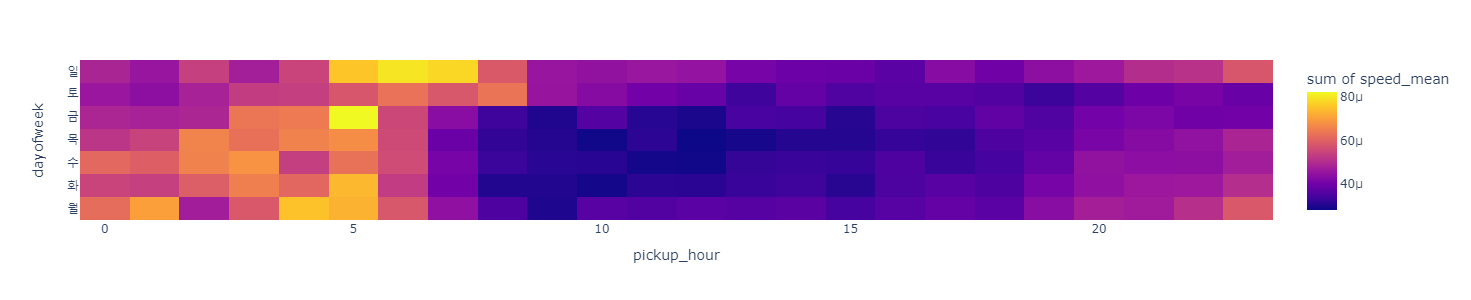

In [65]:
fig1=px.density_heatmap(
    data_frame=tidydata,
    x='pickup_hour',
    y='dayofweek',
    z='speed_mean',
    nbinsx=24,
    nbinsy=7,
    height=300
)

fig1.show()

In [66]:
tidydata = df.pivot_table(
    index = 'pickup_hour',
    columns = 'dayofweek',
    values = 'dist',
    aggfunc = 'mean'
).stack().reset_index().rename({0:'dist_mean'},axis=1)
tidydata = tidydata.sort_values(by='dayofweek', ascending=True)
tidydata['dayofweek'] = tidydata['dayofweek'].map({0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'})


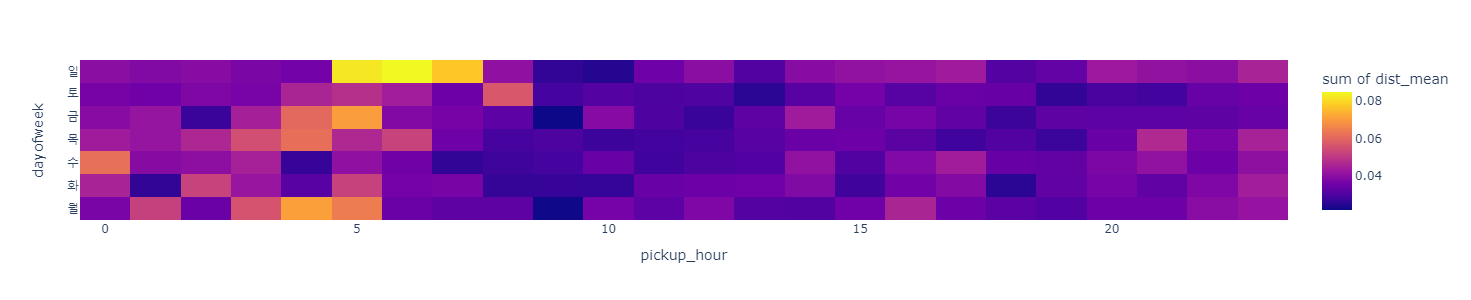

In [68]:
fig2=px.density_heatmap(
    data_frame=tidydata,
    x='pickup_hour',
    y='dayofweek',
    z='dist_mean',
    nbinsx=24,
    nbinsy=7,
    height=300
)

fig2.show()